# Superstore Sales Analysis

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv(r'D:\Portfolio Project\1\AA.csv')

In [11]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

there are null values in Postal Code

In [16]:
null_count = df['Postal Code'].isnull().sum()
null_count

11

In [17]:
# filling empty values with 0
df['Postal Code'].fillna(0, inplace=True)
#changing postal code from float to integer
df['Postal Code'] = df['Postal Code'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int32  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [18]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


# DataCleaning
### Removing Duplicates

In [19]:
if df.duplicated().sum() > 0:
    print("Duplicates are present!!")
else:
    print("No Duplicates!!")

No Duplicates!!


In [20]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9795    False
9796    False
9797    False
9798    False
9799    False
Length: 9800, dtype: bool

In [21]:
df.duplicated(keep=False).sum()

0

# Exploratory Data Analysis
## Customer Analysis
### Customer Segmentation

In [22]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [26]:
# Types of customers
customer_type = df['Segment'].unique()
print(customer_type)

['Consumer' 'Corporate' 'Home Office']


Three types of Customers are in the data

In [33]:
# Number of customers in each segment
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={'index':'Customer Type','Segment':'Total Customers'})
number_of_customers

,Customer Type,Total Customers
0,Consumer,5101
1,Corporate,2953
2,Home Office,1746


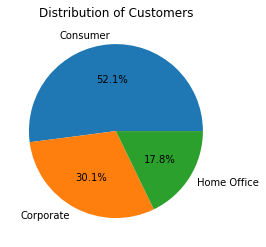

In [34]:
# Plotting a Pie Chart
plt.pie(number_of_customers['Total Customers'], labels=number_of_customers['Customer Type'], autopct='%1.1f%%')
# Set pie chart labels
plt.title('Distribution of Customers')
plt.show()

## Sales per Segment Analysis

In [35]:
# Customers and Sales
sales_per_category = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_category = sales_per_category.rename(columns={'Segment':'Customer Type','Sales':'Total Sales'})
sales_per_category

,Customer Type,Total Sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.249822e+05


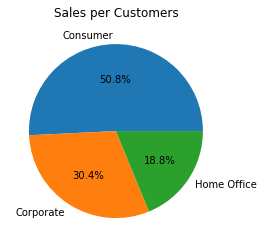

In [38]:
# Plotting a Pie Chart
plt.pie(sales_per_category['Total Sales'], labels=sales_per_category['Customer Type'], autopct='%1.1f%%')
# Set pie chart labels
plt.title('Sales per Customers')
plt.show()

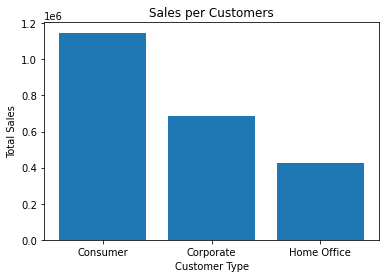

In [41]:
# Plotting a Bar Chart
plt.bar(sales_per_category['Customer Type'], sales_per_category['Total Sales'])
# Set pie chart labels
plt.title('Sales per Customers')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')

plt.show()

Consumer of Most PROFITABLE

## Customer Loyalty

In [56]:
# Group data according to CustomerID, customer Name, segment and calculate frequency of that order
customer_order_freq = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()
# Rename the order ID Column
customer_order_freq.rename(columns={'Order ID':'Total Orders'}, inplace=True)
# Identify repeated Customers
repeated_customer = customer_order_freq[customer_order_freq['Total Orders']>=1]
# Sort customers in descending order
sorted_repeated_customers = repeated_customer.sort_values(by='Total Orders',ascending=False)
sorted_repeated_customers.head(15)#.reset_index(drop=True)
#customer_order_freq

,Customer ID,Customer Name,Segment,Total Orders
787,WB-21850,William Brown,Consumer,35
606,PP-18955,Paul Prost,Home Office,34
482,MA-17560,Matt Abelman,Home Office,34
387,JL-15835,John Lee,Consumer,33
147,CK-12205,Chloris Kastensmidt,Consumer,32
720,SV-20365,Seth Vernon,Consumer,32
349,JD-15895,Jonathan Doherty,Corporate,32
44,AP-10915,Arthur Prichep,Consumer,31
791,ZC-21910,Zuschuss Carroll,Consumer,31
275,EP-13915,Emily Phan,Consumer,31


In [62]:
# Group data according to CustomerID, customer Name wrt sales of that order
customer_sales_freq = df.groupby(['Customer ID', 'Customer Name'])['Sales'].count().reset_index()
# Sort customers in descending order
most_sales = customer_sales_freq.sort_values(by='Sales',ascending=False)
most_sales.head(15).reset_index(drop=True)
#customer_order_freq

,Customer ID,Customer Name,Sales
0,WB-21850,William Brown,35
1,PP-18955,Paul Prost,34
2,MA-17560,Matt Abelman,34
3,JL-15835,John Lee,33
4,CK-12205,Chloris Kastensmidt,32
5,SV-20365,Seth Vernon,32
6,JD-15895,Jonathan Doherty,32
7,AP-10915,Arthur Prichep,31
8,ZC-21910,Zuschuss Carroll,31
9,EP-13915,Emily Phan,31


## Mode of Shipping

In [65]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [67]:
ship = df['Ship Mode'].unique()
ship

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [71]:
ship_freq = df['Ship Mode'].value_counts().reset_index()
shipping = ship_freq.rename(columns={'index':'Mode of Shipping','Ship Mode':'Frequency'})
shipping

,Mode of Shipping,Frequency
0,Standard Class,5859
1,Second Class,1902
2,First Class,1501
3,Same Day,538


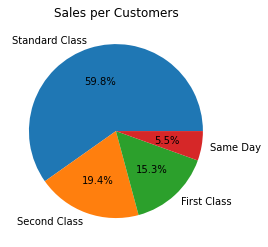

In [76]:
# Plotting a Pie Chart
plt.pie(shipping['Frequency'], labels=shipping['Mode of Shipping'], autopct='%1.1f%%')
# Set pie chart labels
plt.title('Sales per Customers')
plt.show()

## Geographical Analysis

In [83]:
# Customers by State
state = df['State'].value_counts().reset_index()
state = state.rename(columns={'index':'State','State':'Number of Customers'})
print(state.head(10))

            State  Number of Customers
0      California                 1946
1        New York                 1097
2           Texas                  973
3    Pennsylvania                  582
4      Washington                  504
5        Illinois                  483
6            Ohio                  454
7         Florida                  373
8        Michigan                  253
9  North Carolina                  247


In [84]:
# Customers by City
state = df['City'].value_counts().reset_index()
state = state.rename(columns={'index':'City','City':'Number of Customers'})
print(state.head(10))

            City  Number of Customers
0  New York City                  891
1    Los Angeles                  728
2   Philadelphia                  532
3  San Francisco                  500
4        Seattle                  426
5        Houston                  374
6        Chicago                  308
7       Columbus                  221
8      San Diego                  170
9    Springfield                  161


In [87]:
# Group state and sales
df.head(1)
sales_state = df.groupby('State')['Sales'].sum().reset_index()
top_sales = sales_state.sort_values(by='Sales', ascending=False)
top_sales.head(10)

,State,Sales
3,California,446306.4635
30,New York,306361.1470
41,Texas,168572.5322
45,Washington,135206.8500
36,Pennsylvania,116276.6500
8,Florida,88436.5320
11,Illinois,79236.5170
20,Michigan,76136.0740
33,Ohio,75130.3500
44,Virginia,70636.7200


In [89]:
# Group city and sales
#df.head(1)
sales_state = df.groupby('City')['Sales'].sum().reset_index()
top_sales = sales_state.sort_values(by='Sales', ascending=False)
top_sales.head(10)

,City,Sales
327,New York City,252462.5470
265,Los Angeles,173420.1810
450,Seattle,116106.3220
436,San Francisco,109041.1200
372,Philadelphia,108841.7490
207,Houston,63956.1428
80,Chicago,47820.1330
435,San Diego,47521.0290
216,Jacksonville,44713.1830
123,Detroit,42446.9440


## Product Analysis

In [94]:
# Category
cat = df['Category'].unique()
cat

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [101]:
category_type = df.groupby('Category')['Sub-Category'].nunique().reset_index()
sort = category_type.sort_values(by='Sub-Category', ascending=False)
sort

,Category,Sub-Category
1,Office Supplies,9
0,Furniture,4
2,Technology,4


In [102]:
print(df['Sub-Category'])

0         Bookcases
1            Chairs
2            Labels
3            Tables
4           Storage
           ...     
9795        Binders
9796            Art
9797         Phones
9798         Phones
9799    Accessories
Name: Sub-Category, Length: 9800, dtype: object


In [104]:
# Sales per each Category
sales_category = df.groupby('Category')['Sales'].sum().reset_index()
sales_category = sales_category.sort_values(by='Category', ascending=False)
print(sales_category.reset_index(drop=True))

          Category        Sales
0       Technology  827455.8730
1  Office Supplies  705422.3340
2        Furniture  728658.5757


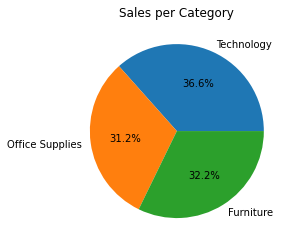

In [106]:
# Plotting a Pie Chart
plt.pie(sales_category['Sales'], labels=sales_category['Category'], autopct='%1.1f%%')
# Set pie chart labels
plt.title('Sales per Category')
plt.show()

In [107]:
# Sub_Category by Sales
pdt_subcategory = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()
top_pdt_subcategory = pdt_subcategory.sort_values(by='Sales', ascending=False)
print(top_pdt_subcategory)

   Sub-Category        Sales
13       Phones  327782.4480
5        Chairs  322822.7310
14      Storage  219343.3920
16       Tables  202810.6280
3       Binders  200028.7850
11     Machines  189238.6310
0   Accessories  164186.7000
6       Copiers  146248.0940
4     Bookcases  113813.1987
1    Appliances  104618.4030
9   Furnishings   89212.0180
12        Paper   76828.3040
15     Supplies   46420.3080
2           Art   26705.4100
7     Envelopes   16128.0460
10       Labels   12347.7260
8     Fasteners    3001.9600


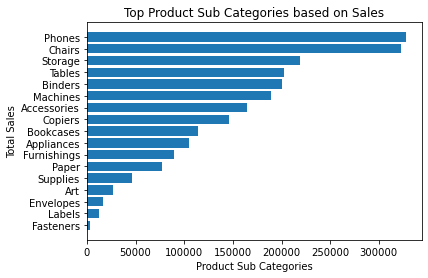

In [109]:
# Plotting the horizontal bar graph
plot = top_pdt_subcategory.sort_values(by='Sales', ascending=True)
plt.barh(plot['Sub-Category'], plot['Sales'])
# Label
plt.title("Top Product Sub Categories based on Sales")
plt.xlabel("Product Sub Categories")
plt.ylabel("Total Sales")
plt.show()

# Sales

In [110]:
# Convert date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True)
# Dropping by year and summing the sales per year
yearly_sales=df.groupby(df['Order Date'].dt.year)['Sales'].sum()
# setting new index and remaining the columns
yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns={'Order Date':'Year','Sales':'Total Sales'})
print(yearly_sales)

   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


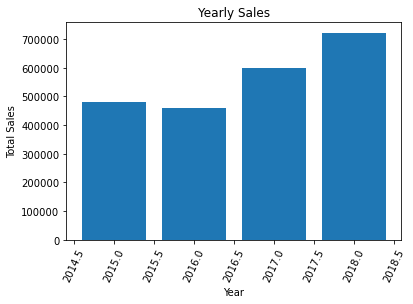

In [112]:
# Plotting the horizontal bar graph 
plt.bar(yearly_sales['Year'], yearly_sales['Total Sales'])
# label
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.xticks(rotation=65)
plt.show()

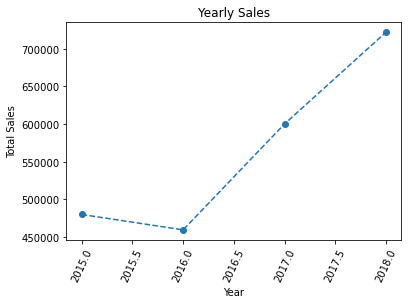

In [117]:
# Plotting the line graph 
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker='o',linestyle='--')
# label
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.xticks(rotation=65)
plt.show()

## Quarterly Sales

In [119]:
# Convert date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True)
# Filter data according to year
yearly_sales = df[df['Order Date'].dt.year==2018]
# Calculate quarterly sales of the year 2018
quarterly_sales = yearly_sales.resample('Q', on='Order Date')['Sales'].sum()
quarterly_sales = quarterly_sales.reset_index()
quarterly_sales = quarterly_sales.rename(columns={'Order Date':'Quarter','Sales':'Total Sales'})
print('These are the Quarterly sales for 2018')
print(quarterly_sales)

These are the Quarterly sales for 2018
     Quarter  Total Sales
0 2018-03-31  122260.8842
1 2018-06-30  127558.6200
2 2018-09-30  193815.8400
3 2018-12-31  278416.6750


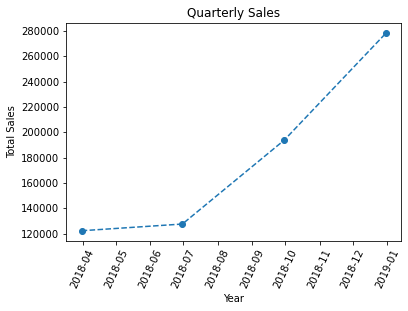

In [125]:
# Plotting the line graph 
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Total Sales'], marker='o',linestyle='--')
# label
plt.title('Quarterly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.xticks(rotation=65)
plt.show()

In [126]:
# Convert date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True)
# Filter data according to year
yearly_sales = df[df['Order Date'].dt.year==2018]
# Calculate quarterly sales of the year 2018
monthly_sales = yearly_sales.resample('M', on='Order Date')['Sales'].sum()
monthly_sales = monthly_sales.reset_index()
monthly_sales = monthly_sales.rename(columns={'Order Date':'Month','Sales':'Total Monthly Sales'})
print('These are the Quarterly sales for 2018')
print(monthly_sales)

These are the Quarterly sales for 2018
        Month  Total Monthly Sales
0  2018-01-31           43476.4740
1  2018-02-28           19920.9974
2  2018-03-31           58863.4128
3  2018-04-30           35541.9101
4  2018-05-31           43825.9822
5  2018-06-30           48190.7277
6  2018-07-31           44825.1040
7  2018-08-31           62837.8480
8  2018-09-30           86152.8880
9  2018-10-31           77448.1312
10 2018-11-30          117938.1550
11 2018-12-31           83030.3888


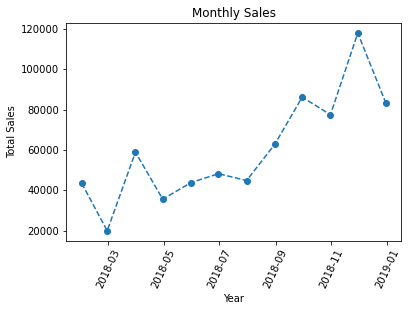

In [127]:
# Plotting the line graph 
plt.plot(monthly_sales['Month'], monthly_sales['Total Monthly Sales'], marker='o',linestyle='--')
# label
plt.title('Monthly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.xticks(rotation=65)
plt.show()